In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("Grocery_Inventory_and_Sales_Dataset.csv")

# Data Cleaning


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnover_Rate  990 non-null    i

In [4]:
df.describe()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Sales_Volume,Inventory_Turnover_Rate
count,990.000000,990.000000,990.000000,990.000000,990.000000
mean,55.609091,51.215152,51.913131,58.925253,50.150505
std,26.300775,29.095241,29.521059,23.002318,28.798954
min,10.000000,1.000000,1.000000,20.000000,1.000000
25%,33.000000,25.250000,25.000000,39.000000,25.000000
50%,56.000000,53.000000,54.000000,58.000000,50.000000
75%,79.000000,77.000000,77.000000,78.000000,74.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
df.isnull().sum()

Product_ID                 0
Product_Name               0
Catagory                   1
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True) 
df.fillna(df.mode().iloc[0], inplace=True) 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

In [9]:
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")


Original dataset shape: (990, 16)
Dataset shape after outlier removal: (990, 16)


In [10]:
df_no_outliers = df_no_outliers.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Univariate Analysis


In [11]:
print("\nSummary Statistics (After Cleaning):")
print(df_no_outliers.describe())


Summary Statistics (After Cleaning):
       Stock_Quantity  Reorder_Level  Reorder_Quantity  Sales_Volume  \
count      990.000000     990.000000        990.000000    990.000000   
mean        55.609091      51.215152         51.913131     58.925253   
std         26.300775      29.095241         29.521059     23.002318   
min         10.000000       1.000000          1.000000     20.000000   
25%         33.000000      25.250000         25.000000     39.000000   
50%         56.000000      53.000000         54.000000     58.000000   
75%         79.000000      77.000000         77.000000     78.000000   
max        100.000000     100.000000        100.000000    100.000000   

       Inventory_Turnover_Rate  
count               990.000000  
mean                 50.150505  
std                  28.798954  
min                   1.000000  
25%                  25.000000  
50%                  50.000000  
75%                  74.750000  
max                 100.000000  


In [12]:
numeric_cols = df_no_outliers.select_dtypes(include=["number"])

# Compute summary statistics
summary_stats = pd.DataFrame({
    "Mean": numeric_cols.mean(),
    "Median": numeric_cols.median(),
    "Mode": numeric_cols.mode().iloc[0],  # First mode value
    "Variance": numeric_cols.var(),
    "Skewness": numeric_cols.skew()
})

# Display summary statistics
print(summary_stats)

                              Mean  Median  Mode    Variance  Skewness
Stock_Quantity           55.609091    56.0  88.0  691.730757  0.005465
Reorder_Level            51.215152    53.0  20.0  846.533036 -0.049323
Reorder_Quantity         51.913131    54.0  74.0  871.492952 -0.070229
Sales_Volume             58.925253    58.0  62.0  529.106642  0.093210
Inventory_Turnover_Rate  50.150505    50.0  26.0  829.379752  0.025674


In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Remove 'Product_ID' if it exists in categorical columns
categorical_cols = [col for col in categorical_cols if col != 'Product_ID']

# Compute frequency distributions
frequency_dict = {}
for col in categorical_cols:
    frequency_dict[col] = df[col].value_counts()

# Print results
for col, freq in frequency_dict.items():
    print(f"\nFrequency Distribution for {col}:")
    print(freq)



Frequency Distribution for Product_Name:
Product_Name
Bread Flour          19
Arabica Coffee       16
Pomegranate          15
Cauliflower          15
Haddock              14
                     ..
Coconut Oil           4
Whole Wheat Bread     4
Cherry                4
Vanilla Biscuit       3
All-Purpose Flour     3
Name: count, Length: 121, dtype: int64

Frequency Distribution for Catagory:
Catagory
Fruits & Vegetables    332
Dairy                  180
Grains & Pulses        162
Seafood                 90
Oils & Fats             77
Beverages               75
Bakery                  74
Name: count, dtype: int64

Frequency Distribution for Supplier_ID:
Supplier_ID
38-037-1699    1
08-359-2568    1
20-201-5639    1
28-162-7486    1
07-754-2313    1
              ..
81-233-6894    1
41-821-0197    1
07-987-4536    1
48-450-4126    1
93-358-1118    1
Name: count, Length: 990, dtype: int64

Frequency Distribution for Supplier_Name:
Supplier_Name
Katz            12
Meevee          10
Quatz 

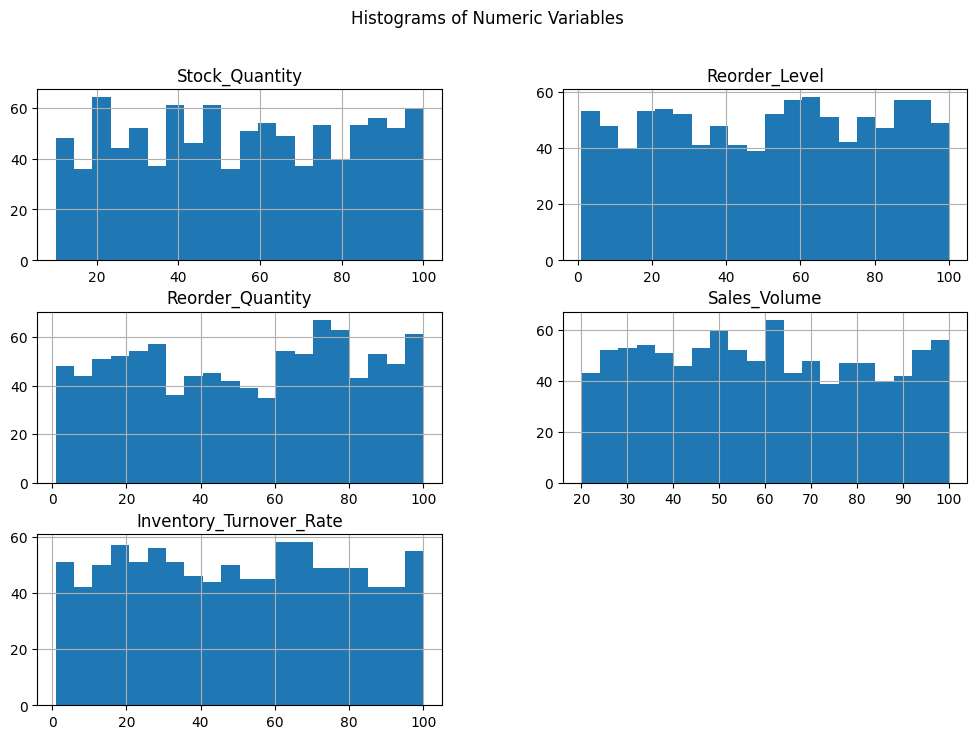

In [14]:
df_no_outliers.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

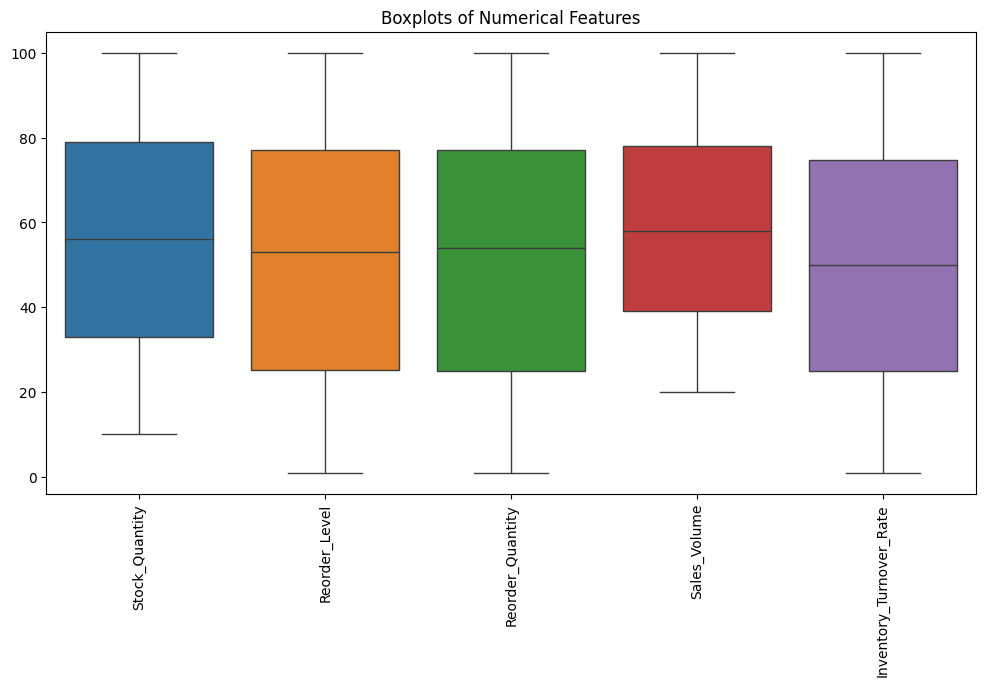

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()

# Bivariate Analysis


Frequency Distribution for Product_Name:
Product_Name
Bread Flour          19
Arabica Coffee       16
Pomegranate          15
Cauliflower          15
Haddock              14
                     ..
Coconut Oil           4
Whole Wheat Bread     4
Cherry                4
Vanilla Biscuit       3
All-Purpose Flour     3
Name: count, Length: 121, dtype: int64


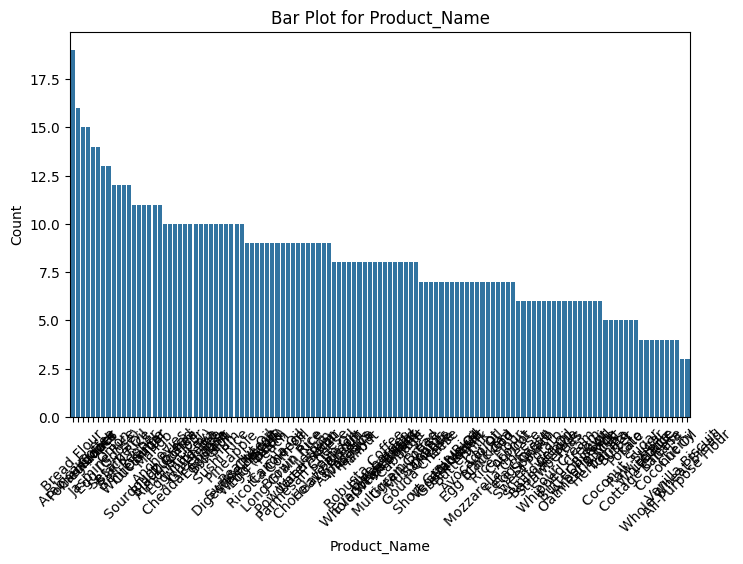


Frequency Distribution for Supplier_Name:
Supplier_Name
Katz            12
Meevee          10
Quatz            9
Photobug         7
Babblestorm      7
                ..
Kazio            1
Twinte           1
Innotype         1
Twitterworks     1
Gabcube          1
Name: count, Length: 350, dtype: int64


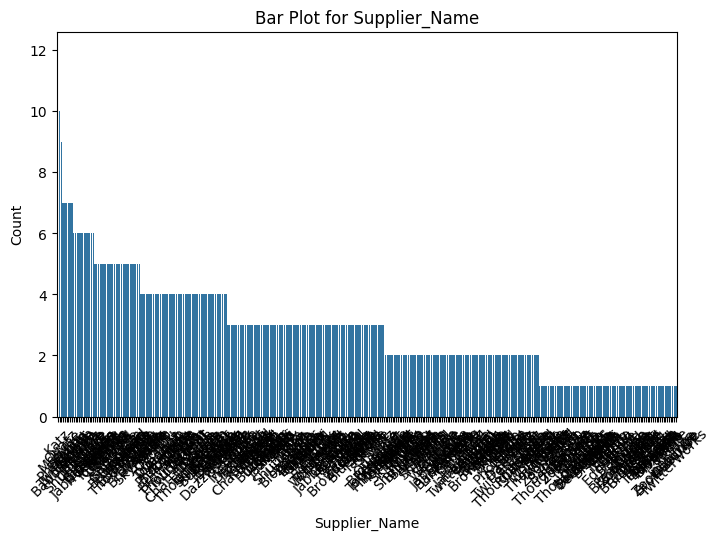


Frequency Distribution for Status:
Status
Discontinued    333
Active          332
Backordered     325
Name: count, dtype: int64


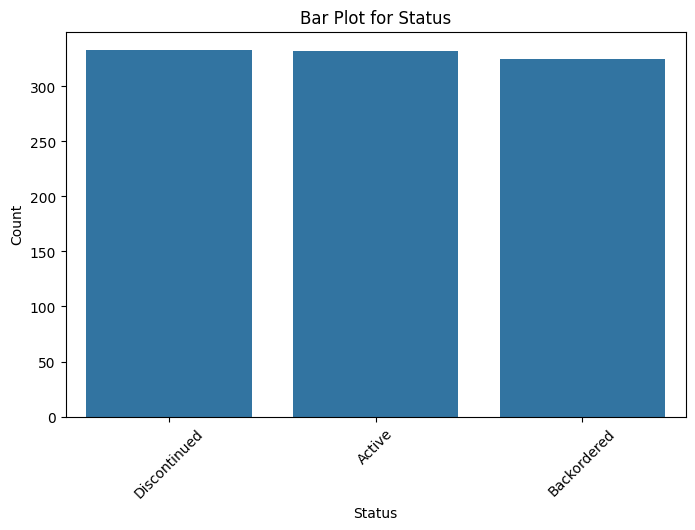

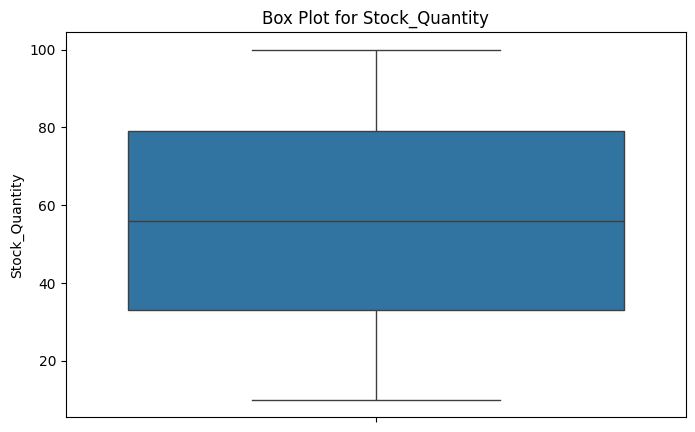

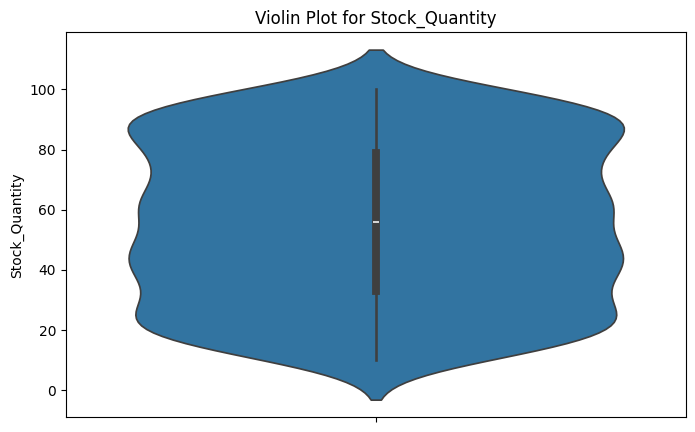

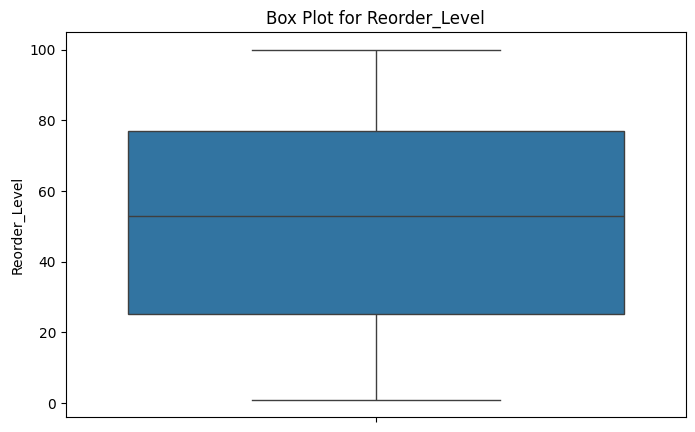

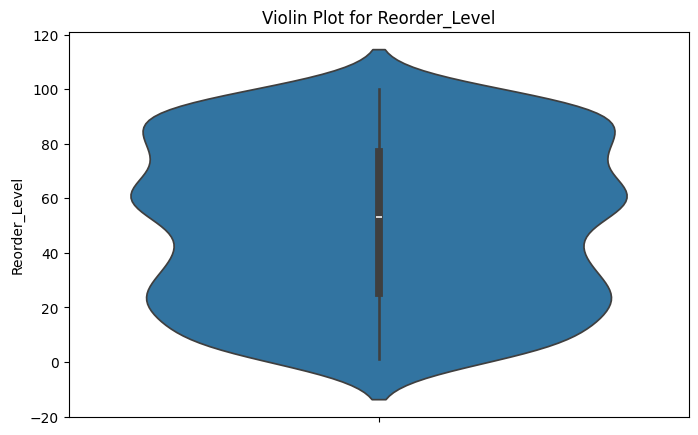

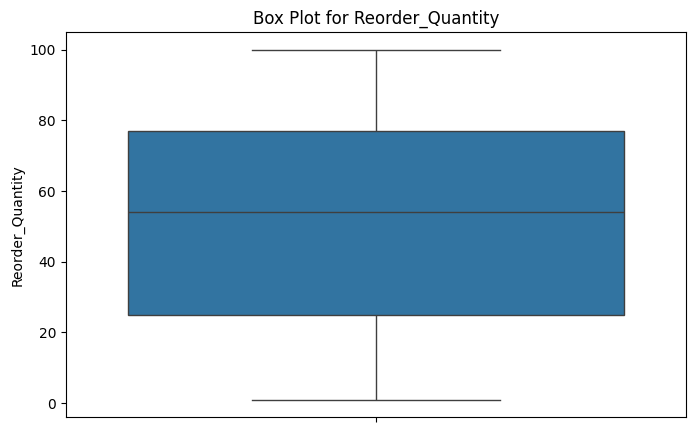

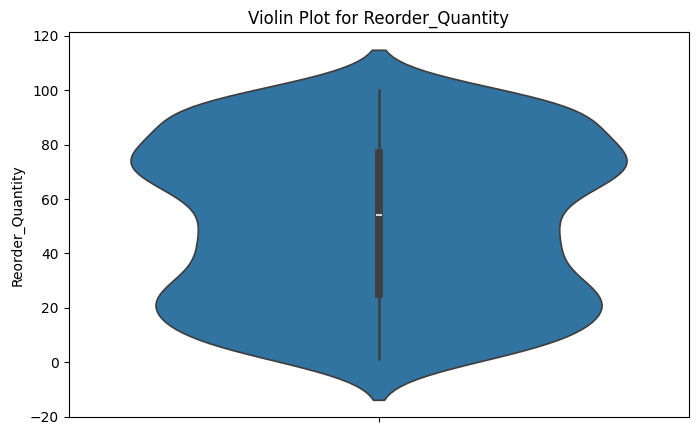

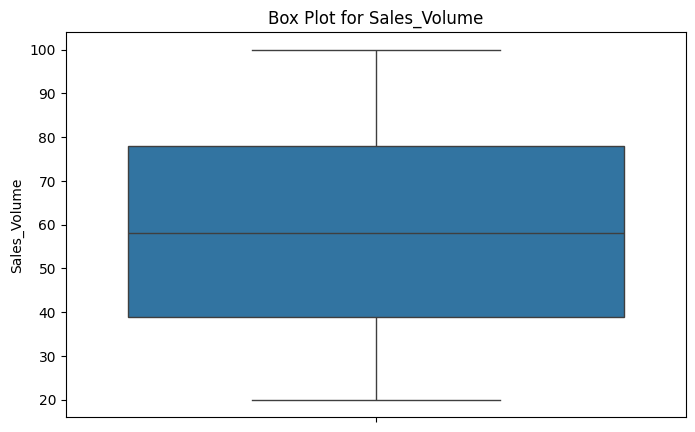

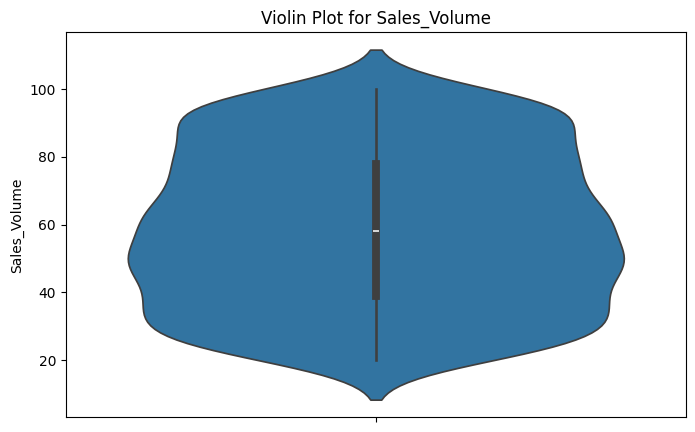

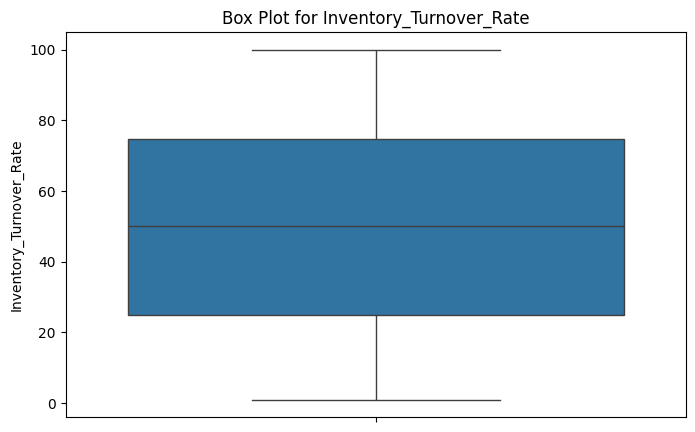

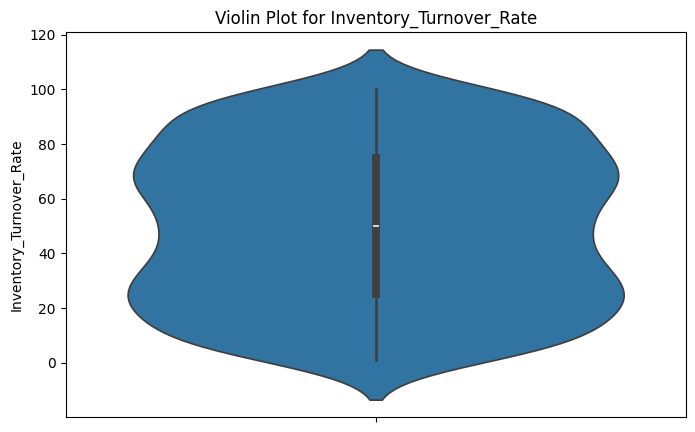

In [16]:
bar_plot_cols = ['Product_Name', 'Category', 'Supplier_Name', 'Status']
    
# Compute frequency distributions for specified columns
frequency_dict = {}
for col in bar_plot_cols:
    if col in df.columns:
        frequency_dict[col] = df[col].value_counts()

# Print results and generate bar plots
for col, freq in frequency_dict.items():
    print(f"\nFrequency Distribution for {col}:")
    print(freq)
    
    # Bar Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=freq.index, y=freq.values)
    plt.xticks(rotation=45)
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Identify numerical columns excluding 'Product_ID' and 'Supplier_ID'
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col not in ['Product_ID', 'Supplier_ID']]

# Box Plots and Violin Plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()


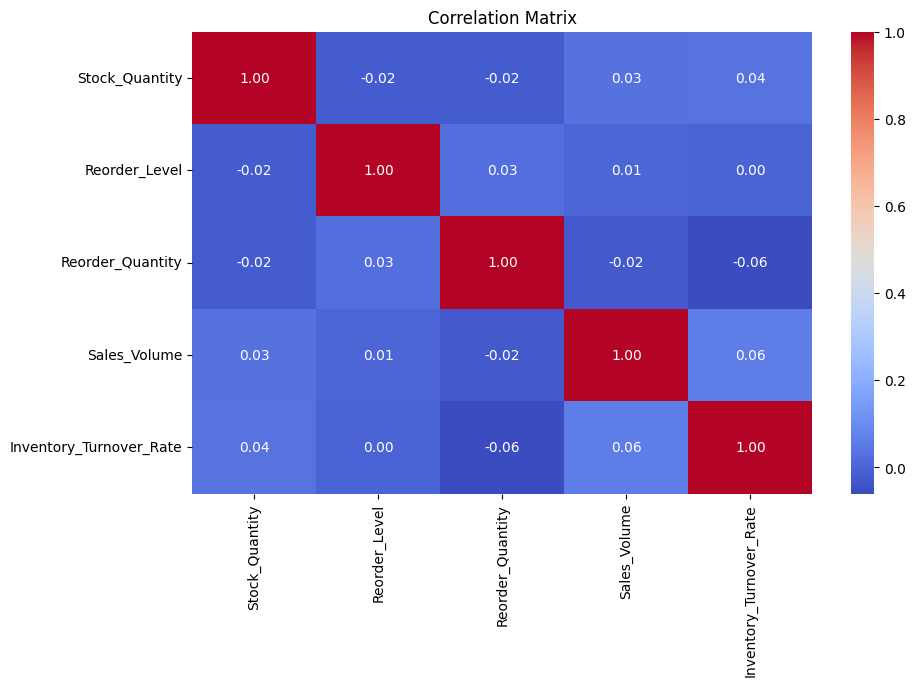

In [17]:
numeric_df = df_no_outliers.select_dtypes(include=[np.number])

if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

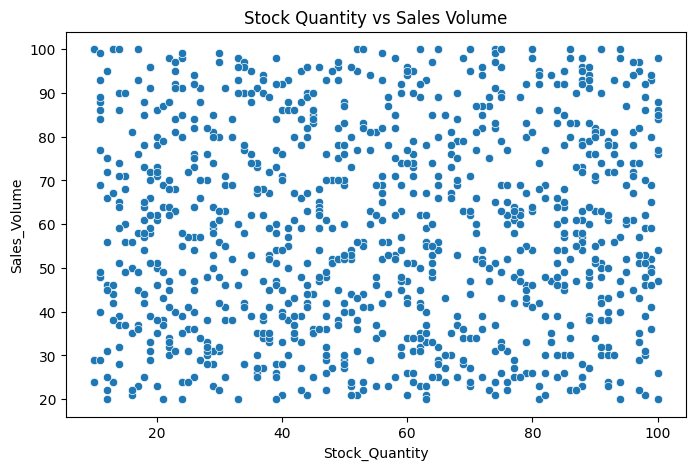

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_no_outliers["Stock_Quantity"], y=df_no_outliers["Sales_Volume"])
plt.title("Stock Quantity vs Sales Volume")
plt.show()

# Multivariate Analysis

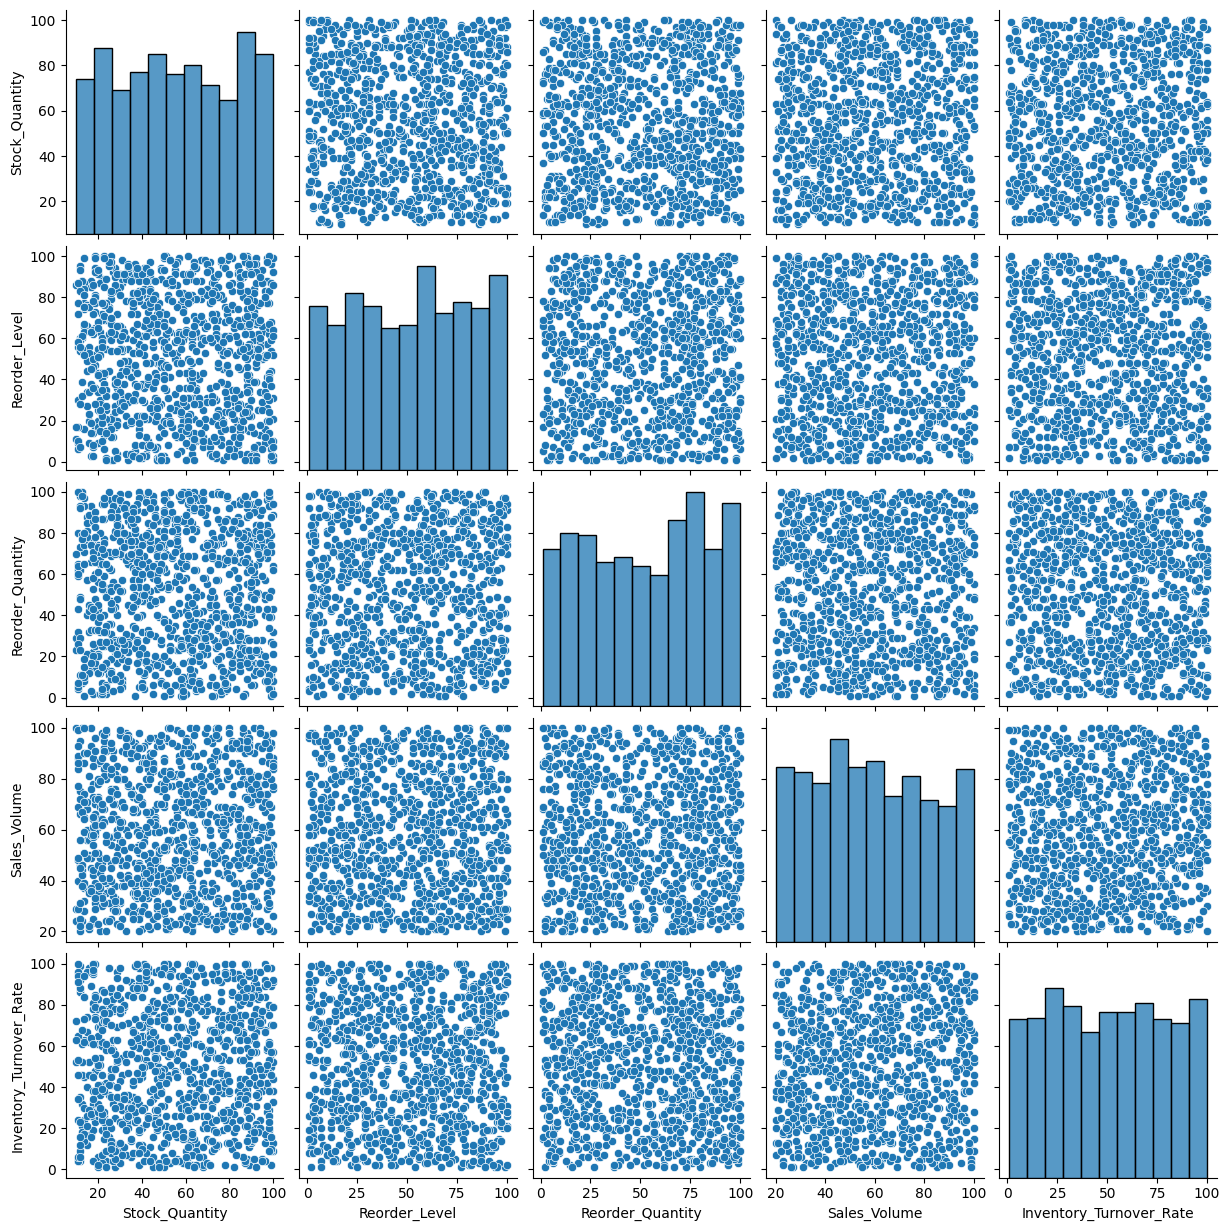

In [19]:
sns.pairplot(df_no_outliers)
plt.show()

In [20]:
corr_matrix = numeric_df.corr()

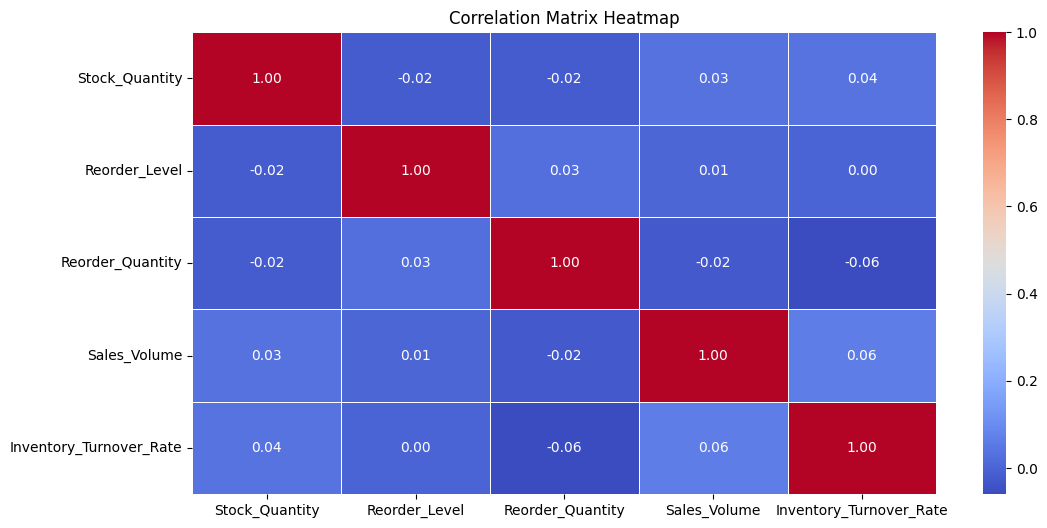

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

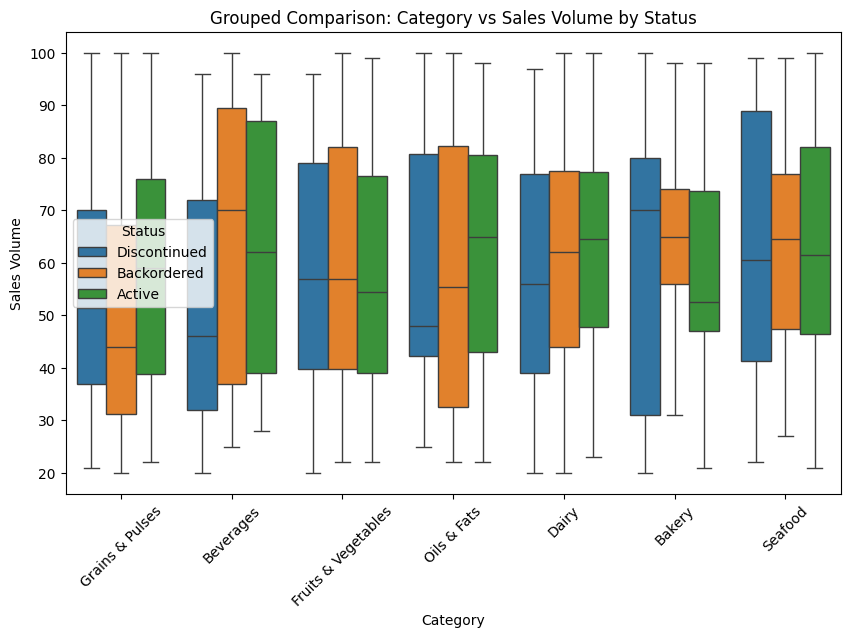

In [24]:
required_cols = ['Catagory', 'Status', 'Sales_Volume']
if all(col in df.columns for col in required_cols):
    # Convert Sales_Volume to numeric if needed
    df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')

    # Drop missing values
    df = df.dropna(subset=['Sales_Volume'])

    # Convert Status to string to avoid issues
    df['Status'] = df['Status'].astype(str)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Catagory', y='Sales_Volume', hue='Status', data=df)
    plt.xticks(rotation=45)
    plt.title('Grouped Comparison: Category vs Sales Volume by Status')
    plt.xlabel('Category')
    plt.ylabel('Sales Volume')
    plt.legend(title='Status')
    plt.show()
else:
    print("One or more required columns are missing from the dataset.")